# Introduction to Dandiset 001174: Calcium imaging in SMA and M1 of macaques

> **⚠️ WARNING: This notebook was automatically generated by AI and has not been fully verified by humans. Please be cautious when interpreting the code or results.**

This notebook demonstrates how to work with calcium imaging data from macaque motor cortices (SMA and M1). The dataset contains recordings from four rhesus macaques during rest and arm reaching tasks, using one-photon calcium imaging with GCaMP6f expression and GRIN lens implants.

Key aspects of the dataset:
* One-photon calcium imaging in deep layers of motor cortices
* Recordings during rest and reaching tasks
* Multiple subjects and sessions
* Data includes fluorescence traces and detected neural events
* Spatial information about detected cells (ROIs)

## Setup and Data Loading

First, let's import the necessary libraries and load an example NWB file. We'll use a session from subject Q which is smaller in size for demonstration purposes.

In [1]:
import pynwb
import lindi
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load an example session
f = lindi.LindiH5pyFile.from_lindi_file("https://lindi.neurosift.org/dandi/dandisets/001174/assets/807851a7-ad52-4505-84ee-3b155a5bd2a3/nwb.lindi.json")
nwb = pynwb.NWBHDF5IO(file=f, mode='r').read()

# Print basic session info
print(f"Subject: {nwb.subject.subject_id}")
print(f"Species: {nwb.subject.species}")
print(f"Session Description: {nwb.session_description}")
print(f"Recording Date: {nwb.session_start_time}")

Subject: Q
Species: Macaca mulatta
Session Description: Calcium imaging in SMA during the arm reaching condition
Recording Date: 2022-09-15 13:39:54.612000+00:00


## Understanding the Data Structure

The NWB file contains several key components:
1. Raw imaging data (`OnePhotonSeries`)
2. Detected cells/ROIs (`PlaneSegmentation`)
3. Fluorescence traces (`Fluorescence/RoiResponseSeries`)
4. Neural event amplitudes (`EventAmplitude`)

Let's examine these components:

In [2]:
# Get information about the imaging data
onephoton = nwb.acquisition["OnePhotonSeries"]
print("Imaging data shape:", onephoton.data.shape)
print(f"Frame rate: {onephoton.rate} Hz")
print(f"Total recording time: {onephoton.data.shape[0]/onephoton.rate:.2f} seconds")

# Get number of detected cells
plane_seg = nwb.processing["ophys"]["ImageSegmentation"]["PlaneSegmentation"]
n_cells = plane_seg["image_mask"].data.shape[0]
print(f"\nNumber of detected cells: {n_cells}")

Imaging data shape: (9041, 320, 200)
Frame rate: 10.0 Hz
Total recording time: 904.10 seconds

Number of detected cells: 40


## Visualizing Cell Locations

Let's create a visualization of where the detected cells are located in the field of view.
We'll use the image masks from the segmentation:

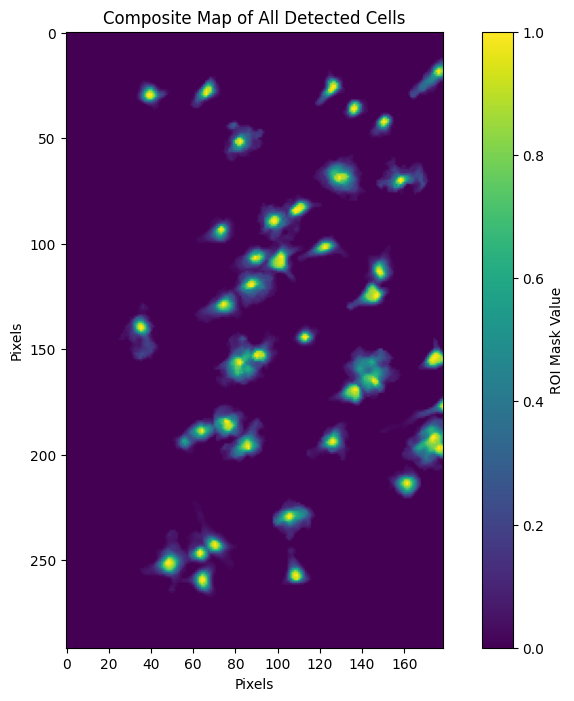

In [3]:
# Load all ROI masks
roi_masks = plane_seg["image_mask"].data[:]  # Shape: [n_cells, height, width]

# Create a composite image showing all ROI locations
composite_mask = np.max(roi_masks, axis=0)

plt.figure(figsize=(10, 8))
plt.imshow(composite_mask, cmap='viridis')
plt.colorbar(label='ROI Mask Value')
plt.title('Composite Map of All Detected Cells')
plt.xlabel('Pixels')
plt.ylabel('Pixels')
plt.show()

## Analyzing Fluorescence Traces

Let's examine the fluorescence traces for a few example cells. We'll load a subset of the data
to avoid memory issues since we're working with remote files.

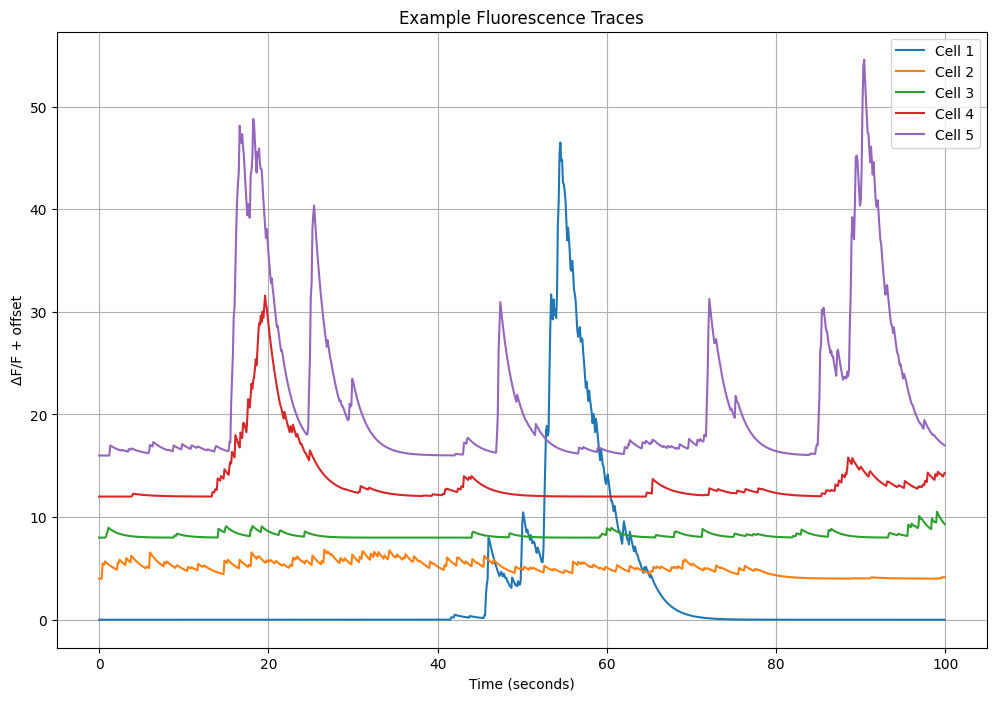

In [4]:
# Get fluorescence data for first 1000 timepoints and first 5 cells
fluor = nwb.processing["ophys"]["Fluorescence"]["RoiResponseSeries"]
sample_data = fluor.data[0:1000, 0:5]  # Shape: [time, cells]
time_vector = np.arange(sample_data.shape[0]) / fluor.rate

plt.figure(figsize=(12, 8))
for i in range(5):
    plt.plot(time_vector, sample_data[:, i] + i*4, label=f'Cell {i+1}')
plt.xlabel('Time (seconds)')
plt.ylabel('ΔF/F + offset')
plt.title('Example Fluorescence Traces')
plt.legend()
plt.grid(True)
plt.show()

## Neural Events Analysis

The dataset also includes detected neural events. Let's compare the fluorescence traces
with the detected event amplitudes for a single cell:

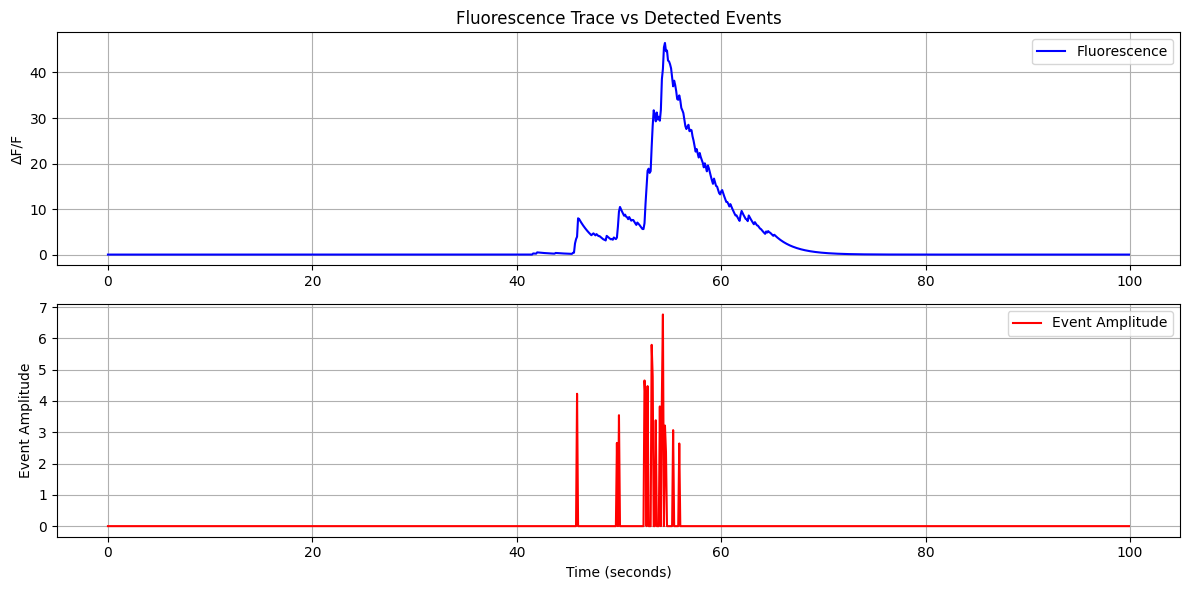

In [5]:
# Get event amplitude data for the same timepoints and first cell
events = nwb.processing["ophys"]["EventAmplitude"]
event_data = events.data[0:1000, 0]  # First cell

plt.figure(figsize=(12, 6))

# Plot fluorescence trace
plt.subplot(211)
plt.plot(time_vector, sample_data[:, 0], 'b', label='Fluorescence')
plt.ylabel('ΔF/F')
plt.title('Fluorescence Trace vs Detected Events')
plt.legend()
plt.grid(True)

# Plot event amplitudes
plt.subplot(212)
plt.plot(time_vector, event_data, 'r', label='Event Amplitude')
plt.xlabel('Time (seconds)')
plt.ylabel('Event Amplitude')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## Summary

This notebook demonstrated how to:
1. Load and access data from the calcium imaging dataset
2. Visualize the spatial organization of detected cells
3. Plot and analyze fluorescence traces
4. Compare fluorescence signals with detected neural events

The complete dataset includes multiple sessions and subjects, allowing for more extensive analyses of:
* Neural activity patterns during rest vs. reaching
* Synchronous activity between cell pairs
* Sequential activation patterns in SMA and M1
* Differences in activity patterns between brain regions

For further analysis, you can:
* Load data from different sessions or subjects
* Analyze longer time periods
* Compare activity between task conditions
* Investigate correlations between cells

Remember to be mindful of memory usage when working with the full dataset, as the files
are hosted remotely and data is streamed over the network.